# Task 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster  import AgglomerativeClustering

In [2]:
df_c=pd.read_csv('DS2_C6_S3_Cities_Data_Challenge.csv')
df_c.head()

,City,Country
0,Oakland,United States
1,Oakville,Canada
2,Oaxaca de Juárez,Mexico
3,Oberhausen,Germany
4,Obihiro,Japan


In [3]:
df_wc=pd.read_csv("DS2_C6_S3_WorldCities_Data_Challenge.csv")
df_wc.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [4]:
df_cost=pd.read_csv('DS2_C6_S3_MoveHubCostOfLiving_Data_Challenge.csv')
df_cost.head()

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Lausanne,3.15,12.59,8.40,1.32,1714.00,4266.11
1,Zurich,3.28,12.59,8.40,1.31,2378.61,4197.55
2,Geneva,2.80,12.94,10.49,1.28,2607.95,3917.72
3,Basel,3.50,11.89,7.35,1.25,1649.29,3847.76
4,Perth,2.87,11.43,10.08,0.97,2083.14,3358.55


In [5]:
df_quality=pd.read_csv('DS2_C6_S3_MoveHubQualityOfLife_Data_Challenge.csv')
df_quality.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86


# Task 2:

In [6]:
df_wc.rename(columns={"city":"City"},inplace=True)
df_wc.head()

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [7]:
df_wc.sort_values(by='population',ascending=False,inplace=True)
df_wc.head()

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [8]:
df_wc['City'].unique()

array(['Tokyo', 'Jakarta', 'Delhi', ..., 'Preševo', 'Bujanovac',
       'Kitamilo'], dtype=object)

In [9]:
df_wc.drop_duplicates(subset='City',keep='first',inplace=True)

### Task 2

In [10]:
df1= df_wc.merge(df_c, on='City', how='left')
df2= df_cost.merge(df_quality, on='City', how='left')
df=df1.merge(df2,on='City',how='inner')

In [11]:
df.shape

(207, 24)

In [12]:
df.columns

Index(['City', 'city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3',
       'admin_name', 'capital', 'population', 'id', 'Country', 'Cappuccino',
       'Cinema', 'Wine', 'Gasoline', 'Avg Rent', 'Avg Disposable Income',
       'Movehub Rating', 'Purchase Power', 'Health Care', 'Pollution',
       'Quality of Life', 'Crime Rating'],
      dtype='object')

In [13]:
df_new=df
df_new=df_new.drop(['lat','lng','id'],axis=1)
df_new.head()

,City,city_ascii,country,iso2,iso3,admin_name,capital,population,Country,Cappuccino,...,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Tokyo,Tokyo,Japan,JP,JPN,Tōkyō,primary,37977000.0,Japan,2.30,...,8.52,0.98,1967.31,2065.67,80.00,47.57,71.53,30.54,69.29,13.91
1,Jakarta,Jakarta,Indonesia,ID,IDN,Jakarta,primary,34540000.0,Indonesia,1.88,...,16.83,0.45,807.70,336.54,69.15,17.38,38.33,57.91,15.66,48.27
2,Delhi,Delhi,India,IN,IND,Delhi,admin,29617000.0,India,0.84,...,7.24,0.84,362.03,362.03,77.12,34.39,74.99,73.03,42.45,52.56
3,Mumbai,Mumbai,India,IN,IND,Mahārāshtra,admin,23355000.0,India,0.84,...,6.03,0.89,603.39,337.90,77.13,28.83,58.41,70.49,26.43,34.63
4,Manila,Manila,Philippines,PH,PHL,Manila,primary,23088000.0,Philippines,1.58,...,4.75,0.86,791.68,221.67,68.31,14.80,80.56,65.22,13.14,66.36


In [14]:
df_new['population'].fillna(df_new['population'].mean(),inplace=True)
df_new['city_ascii'].fillna(df_new['city_ascii'].mode()[0],inplace=True)
df_new['country'].fillna(df_new['country'].mode()[0],inplace=True)
df_new['iso2'].fillna(df_new['iso2'].mode()[0],inplace=True)
df_new['iso3'].fillna(df_new['iso3'].mode()[0],inplace=True)
df_new['admin_name'].fillna(df_new['admin_name'].mode()[0],inplace=True)
df_new['capital'].fillna(df_new['capital'].mode()[0],inplace=True)


In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
df_new.isna().sum()

City                      0
city_ascii                0
country                   0
iso2                      0
iso3                      0
admin_name                0
capital                   0
population                0
Country                  18
Cappuccino                0
Cinema                    0
Wine                      0
Gasoline                  0
Avg Rent                  0
Avg Disposable Income     0
Movehub Rating            0
Purchase Power            0
Health Care               0
Pollution                 0
Quality of Life           0
Crime Rating              0
dtype: int64

In [17]:
df_new.dtypes

City                      object
city_ascii                object
country                   object
iso2                      object
iso3                      object
admin_name                object
capital                   object
population               float64
Country                   object
Cappuccino               float64
Cinema                   float64
Wine                     float64
Gasoline                 float64
Avg Rent                 float64
Avg Disposable Income    float64
Movehub Rating           float64
Purchase Power           float64
Health Care              float64
Pollution                float64
Quality of Life          float64
Crime Rating             float64
dtype: object

In [18]:
scale=MinMaxScaler()
numeric_features = df_new.select_dtypes(include=['float']).columns.tolist()
df_new[numeric_features] = scale.fit_transform(df_new[numeric_features])
df_new

,City,city_ascii,country,iso2,iso3,admin_name,capital,population,Country,Cappuccino,...,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Tokyo,Tokyo,Japan,JP,JPN,Tōkyō,primary,1.000000,Japan,0.457711,...,0.266028,0.565217,0.374446,0.469189,0.501496,0.481923,0.674830,0.330448,0.729262,0.062671
1,Jakarta,Jakarta,Indonesia,ID,IDN,Jakarta,primary,0.909478,Indonesia,0.353234,...,0.611990,0.236025,0.139309,0.052072,0.231057,0.128700,0.232930,0.626596,0.118163,0.511294
2,Delhi,Delhi,India,IN,IND,Delhi,admin,0.779818,India,0.094527,...,0.212739,0.478261,0.048939,0.058221,0.429711,0.327717,0.720884,0.790197,0.423428,0.567306
3,Mumbai,Mumbai,India,IN,IND,Mahārāshtra,admin,0.614893,India,0.094527,...,0.162365,0.509317,0.097880,0.052400,0.429960,0.262665,0.500200,0.762714,0.240884,0.333203
4,Manila,Manila,Philippines,PH,PHL,Manila,primary,0.607861,Philippines,0.278607,...,0.109076,0.490683,0.136060,0.024362,0.210120,0.098514,0.795022,0.705691,0.089448,0.747487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Stavanger,Stavanger,Norway,NO,NOR,Rogaland,admin,0.003186,Norway,1.000000,...,0.470858,1.000000,0.429890,0.684390,0.486790,0.470457,0.554372,0.315192,0.811418,0.153023
203,Luxembourg,Luxembourg,Luxembourg,LU,LUX,Luxembourg,primary,0.003001,Luxembourg,0.415423,...,0.088676,0.670807,0.321249,0.690642,0.647308,0.819703,0.517636,0.618589,0.867366,0.125865
204,Galway,Galway,Ireland,IE,IRL,Galway,admin,0.001874,NaN,0.415423,...,0.177352,0.819876,0.148389,0.423305,0.581007,0.610858,0.427792,0.567734,0.826800,0.413500
205,Bogota,Bogota,United States,US,USA,New Jersey,primary,0.000000,Colombia,0.196517,...,0.222731,0.453416,0.062103,0.049742,0.267198,0.095238,0.706243,0.157325,0.273929,0.481917


In [19]:
numeric_feature = df_new.select_dtypes(include=['float']).columns.tolist()

x=np.array(df_new[numeric_feature])
x

array([[1.        , 0.45771144, 0.12860453, ..., 0.33044795, 0.72926162,
        0.06267137],
       [0.90947799, 0.35323383, 0.02008239, ..., 0.62659597, 0.11816317,
        0.5112939 ],
       [0.77981844, 0.09452736, 0.007724  , ..., 0.79019693, 0.42342753,
        0.56730644],
       ...,
       [0.00187441, 0.41542289, 0.07543769, ..., 0.56773426, 0.82680036,
        0.41350046],
       [0.        , 0.19651741, 0.03166838, ..., 0.15732525, 0.2739289 ,
        0.4819167 ],
       [0.10465701, 0.30845771, 0.0700309 , ..., 0.73339104, 0.68072015,
        0.17077948]])

# Task 3

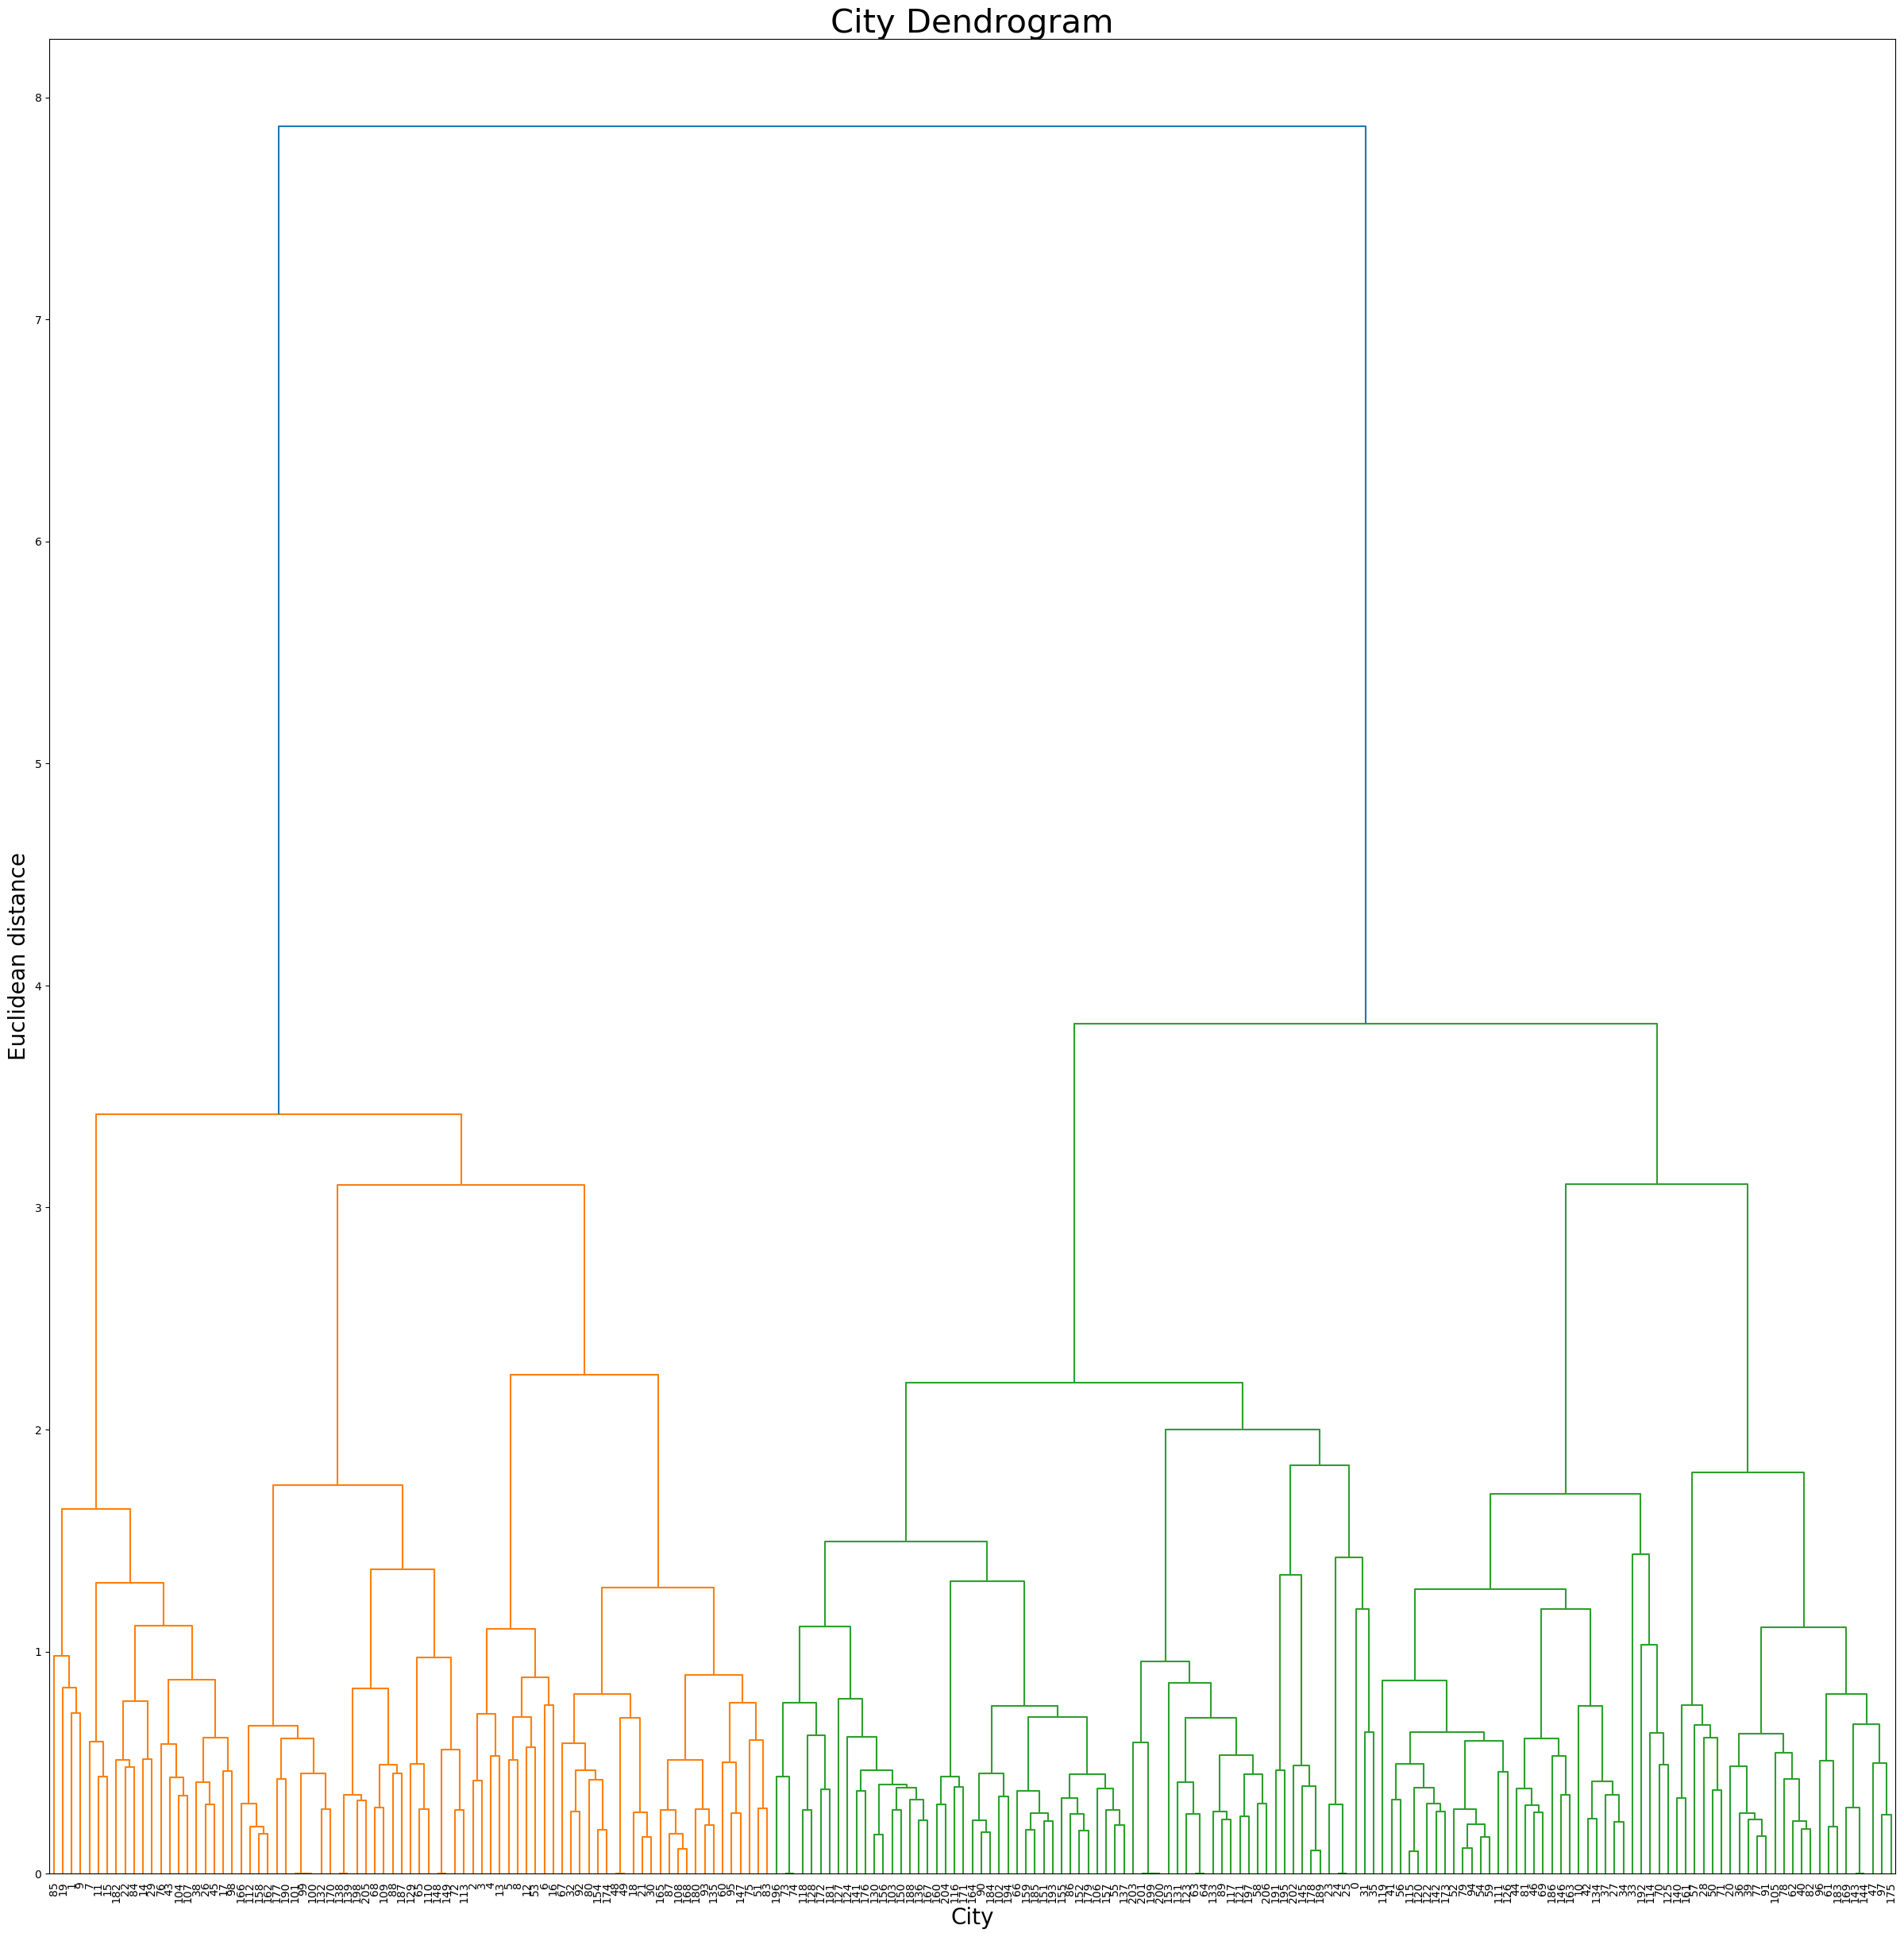

In [21]:
plt.figure(figsize=(30, 30))
dendrogrm = dendrogram(linkage(x, method = 'ward'),labels=df.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('City Dendrogram',fontsize=30)
plt.xlabel('City',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()



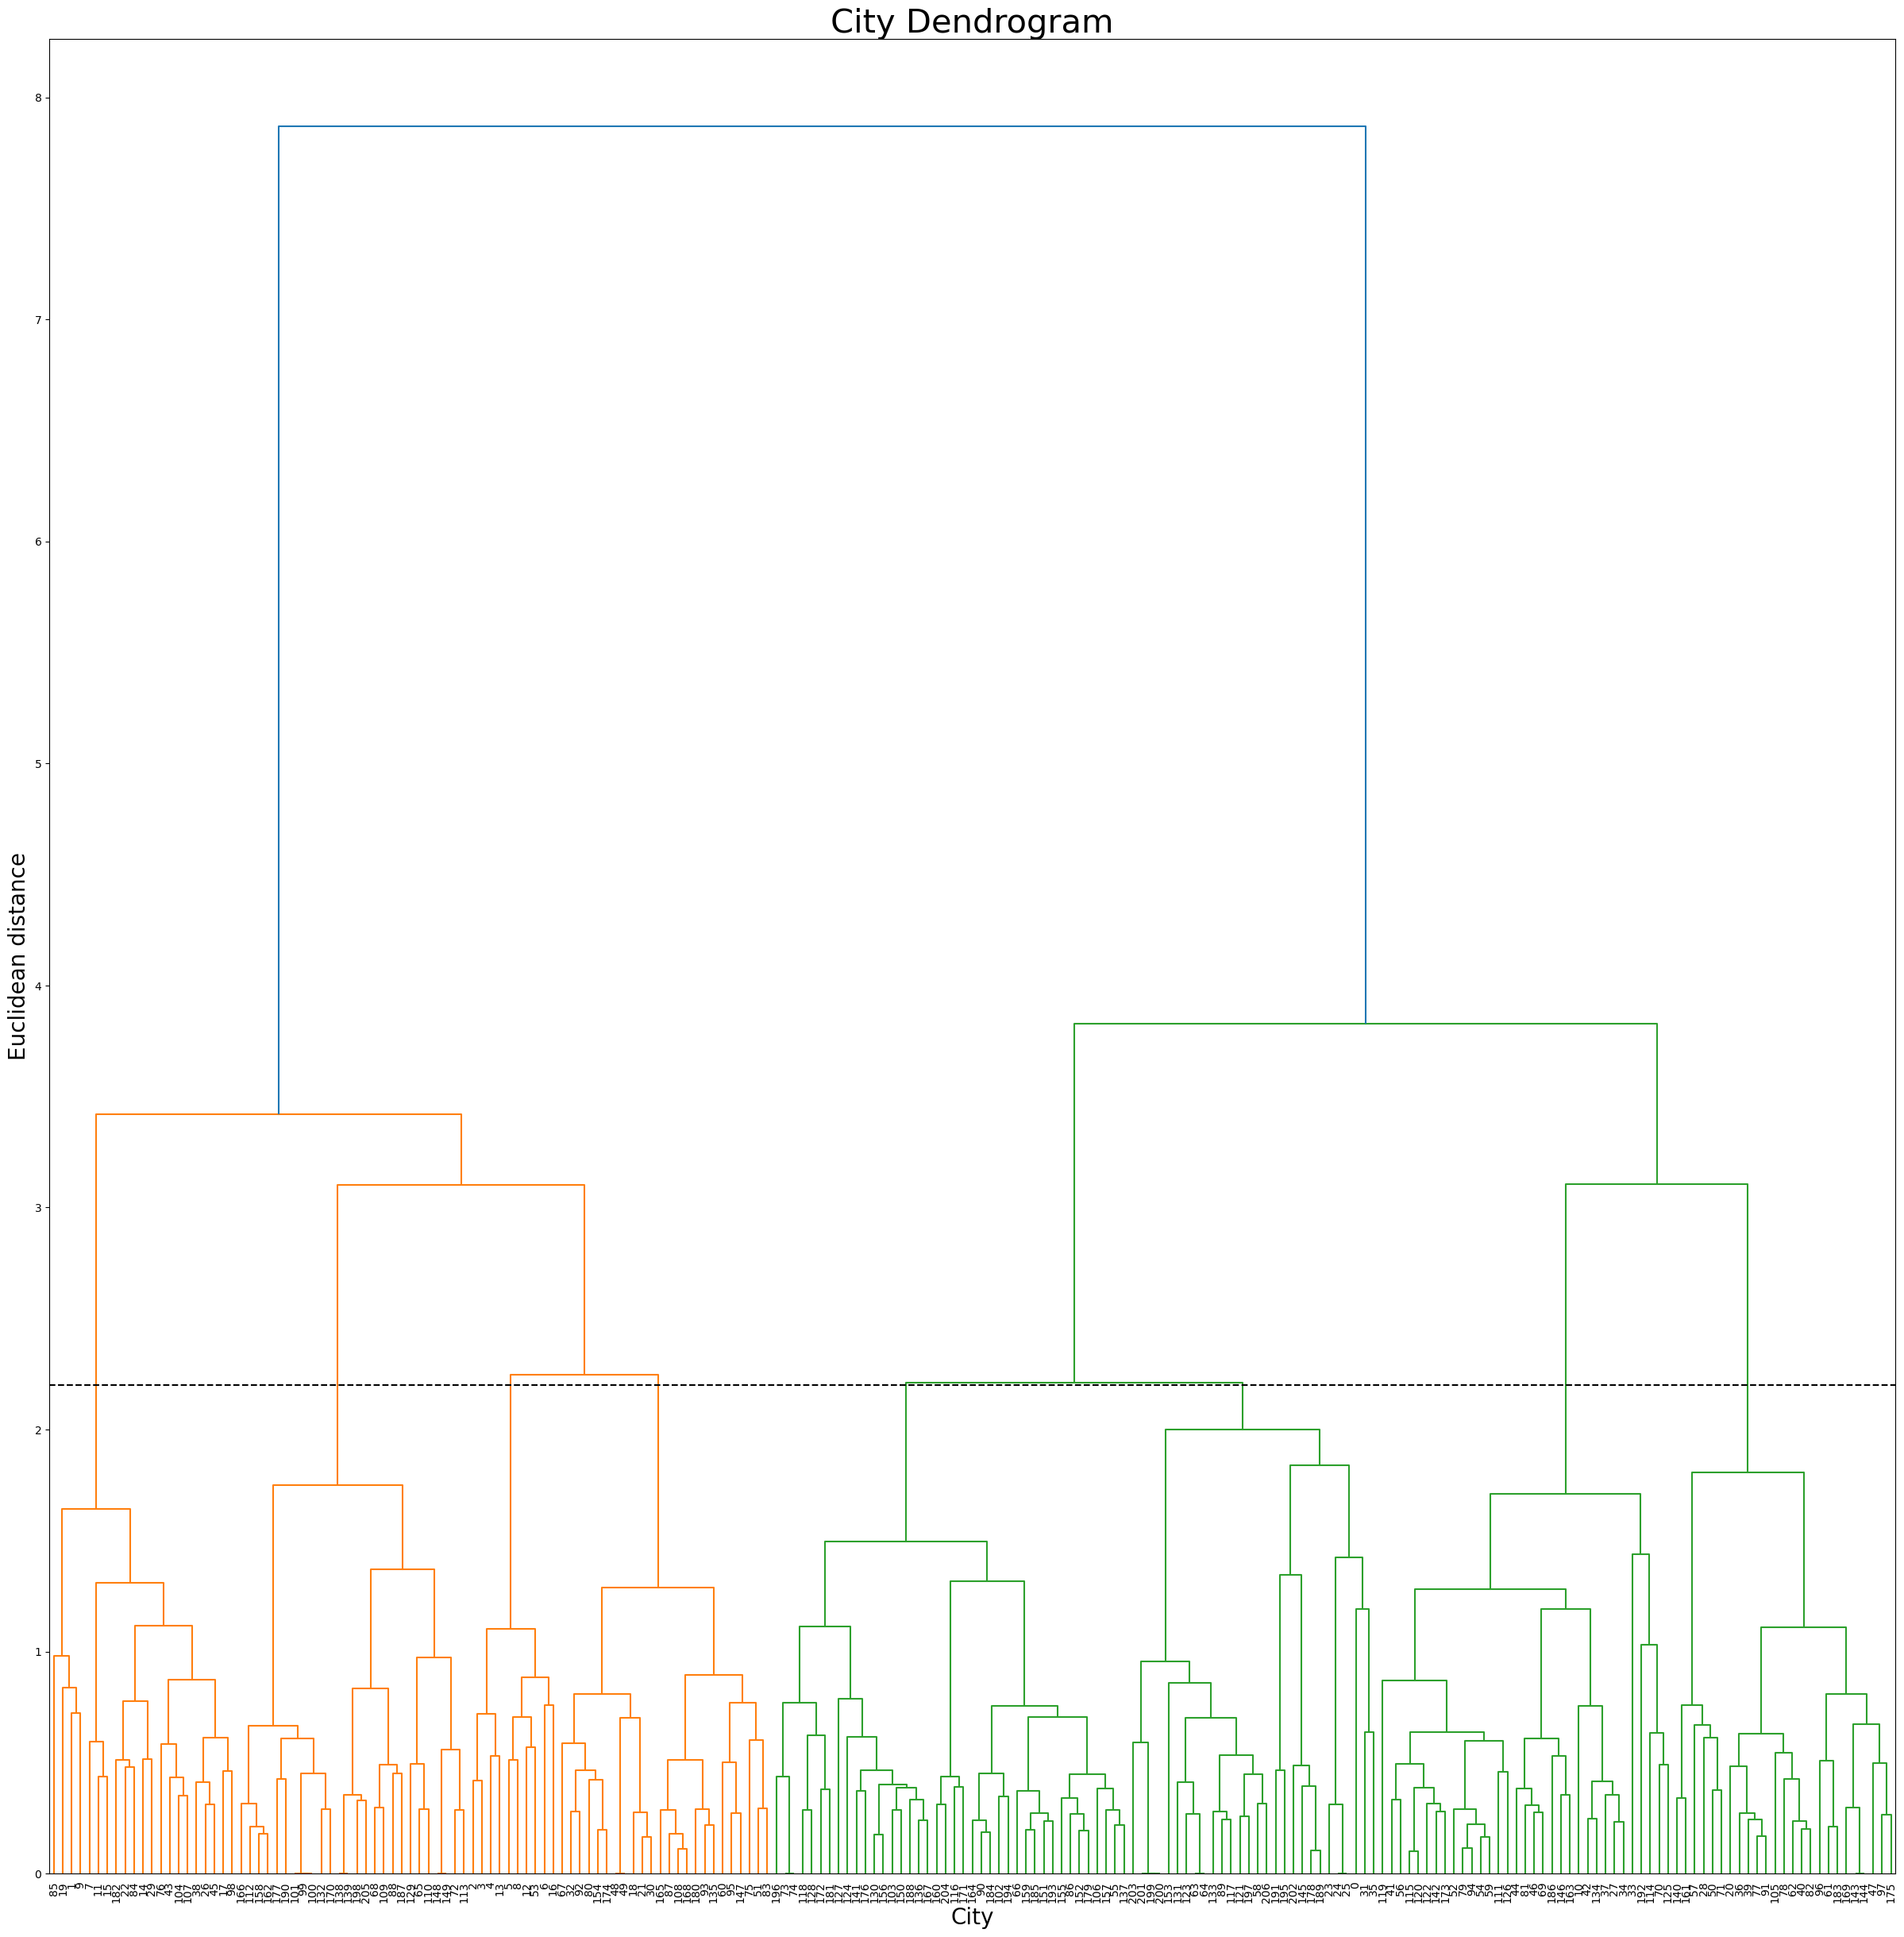

In [22]:
plt.figure(figsize=(30,30))
dendrogrm =dendrogram(linkage(x, method = 'ward'),labels=df.index)
plt.axhline(y=2.2, color='black', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('City Dendrogram',fontsize=30)
plt.xlabel('City',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

- The setting that works well is 2.2 defined from the Maximum distance of subclusters.
- With this setting the clusters obtained are 7

In [23]:
hc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
pred = hc.fit_predict(x)
pred

array([0, 3, 6, 6, 6, 6, 6, 3, 6, 3, 4, 3, 6, 6, 3, 3, 6, 3, 5, 3, 1, 5,
       3, 0, 0, 0, 3, 4, 1, 3, 5, 0, 5, 4, 4, 0, 1, 4, 3, 1, 1, 4, 4, 3,
       4, 3, 4, 1, 5, 5, 1, 5, 4, 6, 4, 0, 4, 1, 0, 4, 5, 1, 1, 0, 0, 2,
       0, 5, 2, 4, 4, 1, 2, 0, 0, 5, 3, 1, 1, 4, 5, 4, 1, 5, 3, 3, 0, 5,
       2, 0, 0, 1, 5, 5, 4, 5, 1, 1, 3, 2, 2, 2, 0, 0, 3, 1, 0, 3, 5, 2,
       2, 4, 2, 2, 4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 4, 0, 0, 2, 0, 0,
       2, 0, 4, 5, 0, 0, 2, 2, 1, 0, 4, 1, 1, 0, 4, 5, 2, 2, 0, 0, 0, 0,
       5, 0, 0, 0, 2, 0, 0, 1, 2, 4, 0, 5, 2, 0, 5, 1, 2, 0, 0, 4, 5, 1,
       0, 2, 0, 0, 5, 0, 3, 1, 0, 0, 4, 2, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0], dtype=int64)

# Task 4:

- Task 4.1 has been implemented in the above task 3 ( Applying the Agglometrative hierarchical clustering (Bottom Up)

In [24]:
df_new[numeric_feature]

,population,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,1.000000,0.457711,0.128605,0.266028,0.565217,0.374446,0.469189,0.501496,0.481923,0.674830,0.330448,0.729262,0.062671
1,0.909478,0.353234,0.020082,0.611990,0.236025,0.139309,0.052072,0.231057,0.128700,0.232930,0.626596,0.118163,0.511294
2,0.779818,0.094527,0.007724,0.212739,0.478261,0.048939,0.058221,0.429711,0.327717,0.720884,0.790197,0.423428,0.567306
3,0.614893,0.094527,0.015577,0.162365,0.509317,0.097880,0.052400,0.429960,0.262665,0.500200,0.762714,0.240884,0.333203
4,0.607861,0.278607,0.012358,0.109076,0.490683,0.136060,0.024362,0.210120,0.098514,0.795022,0.705691,0.089448,0.747487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.003186,1.000000,0.113800,0.470858,1.000000,0.429890,0.684390,0.486790,0.470457,0.554372,0.315192,0.811418,0.153023
203,0.003001,0.415423,0.070031,0.088676,0.670807,0.321249,0.690642,0.647308,0.819703,0.517636,0.618589,0.867366,0.125865
204,0.001874,0.415423,0.075438,0.177352,0.819876,0.148389,0.423305,0.581007,0.610858,0.427792,0.567734,0.826800,0.413500
205,0.000000,0.196517,0.031668,0.222731,0.453416,0.062103,0.049742,0.267198,0.095238,0.706243,0.157325,0.273929,0.481917


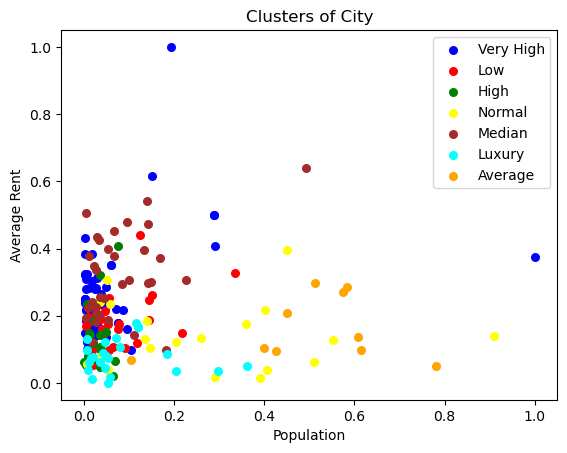

In [25]:
plt.scatter(x[pred==0,0],x[pred==0,5],s=30,c='blue',label='Very High')
plt.scatter(x[pred==1,0],x[pred==1,5],s=30,c='red',label='Low')
plt.scatter(x[pred==2,0],x[pred==2,5],s=30,c='green',label='High')
plt.scatter(x[pred==3,0],x[pred==3,5],s=30,c='yellow',label='Normal')
plt.scatter(x[pred==4,0],x[pred==4,5],s=30,c='brown',label='Median')
plt.scatter(x[pred==5,0],x[pred==5,5],s=30,c='cyan',label='Luxury')
plt.scatter(x[pred==6,0],x[pred==6,5],s=30,c='orange',label='Average')

plt.title('Clusters of City')
plt.xlabel('Population')
plt.ylabel('Average Rent')
plt.legend()
plt.show()

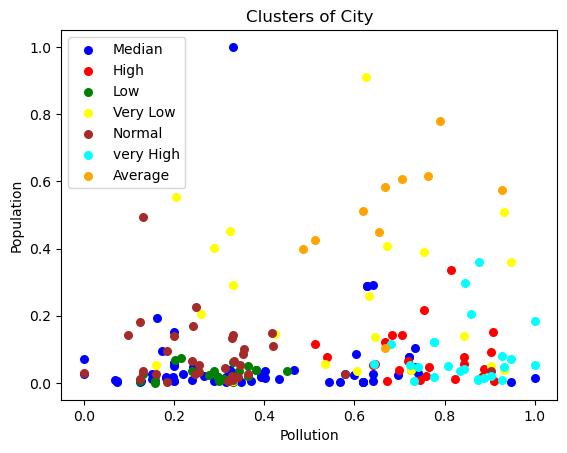

In [26]:
plt.scatter(x[pred==0,10],x[pred==0,0],s=30,c='blue',label='Median')
plt.scatter(x[pred==1,10],x[pred==1,0],s=30,c='red',label='High')
plt.scatter(x[pred==2,10],x[pred==2,0],s=30,c='green',label='Low')
plt.scatter(x[pred==3,10],x[pred==3,0],s=30,c='yellow',label='Very Low')
plt.scatter(x[pred==4,10],x[pred==4,0],s=30,c='brown',label='Normal')
plt.scatter(x[pred==5,10],x[pred==5,0],s=30,c='cyan',label='very High')
plt.scatter(x[pred==6,10],x[pred==6,0],s=30,c='orange',label='Average')

plt.title('Clusters of City')
plt.xlabel('Pollution')
plt.ylabel('Population')
plt.legend()
plt.show()

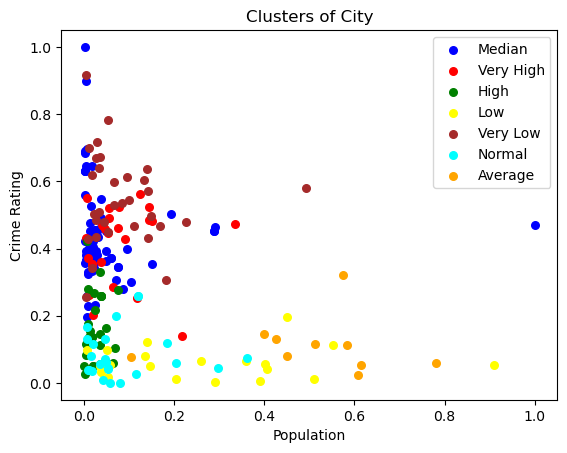

In [27]:
plt.scatter(x[pred==0,0],x[pred==0,6],s=30,c='blue',label='Median')
plt.scatter(x[pred==1,0],x[pred==1,6],s=30,c='red',label='Very High')
plt.scatter(x[pred==2,0],x[pred==2,6],s=30,c='green',label='High')
plt.scatter(x[pred==3,0],x[pred==3,6],s=30,c='yellow',label='Low')
plt.scatter(x[pred==4,0],x[pred==4,6],s=30,c='brown',label='Very Low')
plt.scatter(x[pred==5,0],x[pred==5,6],s=30,c='cyan',label='Normal')
plt.scatter(x[pred==6,0],x[pred==6,6],s=30,c='orange',label='Average')

plt.title('Clusters of City')
plt.xlabel('Population')
plt.ylabel('Crime Rating')
plt.legend()
plt.show()

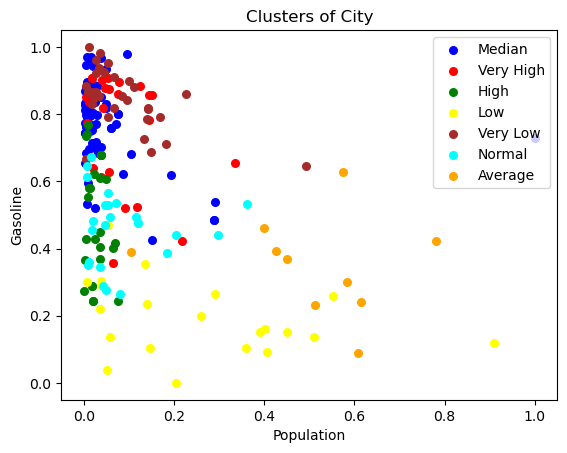

In [28]:
plt.scatter(x[pred==0,0],x[pred==0,11],s=30,c='blue',label='Median')
plt.scatter(x[pred==1,0],x[pred==1,11],s=30,c='red',label='Very High')
plt.scatter(x[pred==2,0],x[pred==2,11],s=30,c='green',label='High')
plt.scatter(x[pred==3,0],x[pred==3,11],s=30,c='yellow',label='Low')
plt.scatter(x[pred==4,0],x[pred==4,11],s=30,c='brown',label='Very Low')
plt.scatter(x[pred==5,0],x[pred==5,11],s=30,c='cyan',label='Normal')
plt.scatter(x[pred==6,0],x[pred==6,11],s=30,c='orange',label='Average')

plt.title('Clusters of City')
plt.xlabel('Population')
plt.ylabel('Gasoline')
plt.legend()
plt.show()